In [1]:
# -*- coding:utf-8 -*-
#模型构建
#使用K-means聚类算法分类并分析每类的特征
import pandas as pd
from pandas import DataFrame,Series
from sklearn.cluster import KMeans #导入K均值聚类算法
k = 5 # 聚为5类
d3 = pd.read_excel('sjbzh.xlsx')

#调用k-means算法，进行聚类分析
kmodel = KMeans(n_clusters=k, n_jobs=4)# n_job是并行数，一般等于CPU数较好
kmodel.fit(d3)


labels = kmodel.labels_#查看各样本类别
demo = DataFrame(labels,columns=['numbers'])
demo1= DataFrame(kmodel.cluster_centers_, columns=d3.columns) # 保存聚类中心
demo2= demo['numbers'].value_counts() # 确定各个类的数目

demo4 = pd.concat([demo2,demo1],axis=1)
demo4.index.name='labels'
demo4.to_excel('kmeansresults.xlsx')

In [2]:
demo2= demo['numbers'].value_counts() # 确定各个类的数目
demo2

2    25230
0    16008
4    12357
3     5312
1     3137
Name: numbers, dtype: int64

In [2]:
print kmodel.cluster_centers_#查看聚类中心
print kmodel.labels_#查看各样本类别

[[ 1.16068415 -0.37740547 -0.08693346 -0.09494912 -0.15771737]
 [-0.70032089 -0.41496445 -0.16097469 -0.16077467 -0.25509512]
 [ 0.482923   -0.79940459  2.48309523  2.42434109  0.30842526]
 [-0.31388694  1.68629965 -0.57392681 -0.53672534 -0.17336233]
 [ 0.05490717 -0.00456613 -0.22770954 -0.23158293  2.18563009]]
[2 2 2 ..., 1 3 3]


In [3]:
#画雷达图 客户群特征分析图
subset = demo1.copy()
subset = subset.round(3)
subset.to_excel('testradar.xlsx')

In [4]:
data = subset.as_matrix()
data

array([[ 1.161, -0.377, -0.087, -0.095, -0.158],
       [-0.7  , -0.415, -0.161, -0.161, -0.255],
       [ 0.483, -0.799,  2.483,  2.424,  0.308],
       [-0.314,  1.686, -0.574, -0.537, -0.173],
       [ 0.055, -0.005, -0.228, -0.232,  2.186]])

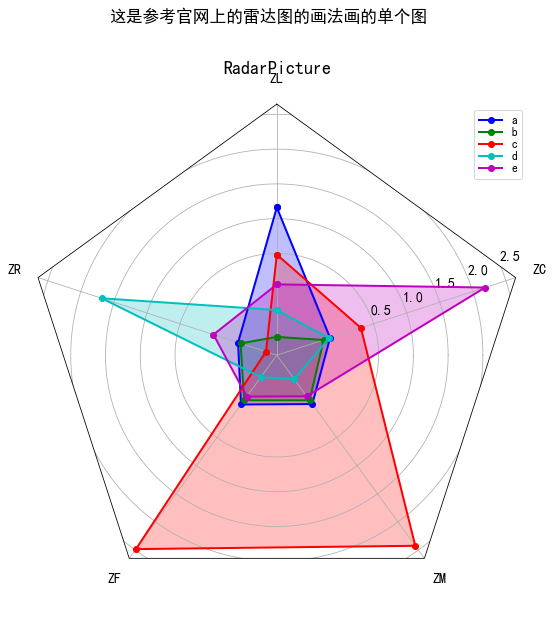

In [6]:
from radar1 import drawRader  # 从已经编写好的画雷达图的函数中导入
title = 'RadarPicture'
rgrids = [0.5, 1, 1.5, 2, 2.5]
itemnames = ['ZL','ZR','ZF','ZM','ZC']
labels = list('abcde')
drawRader(itemnames=itemnames,data=data,title=title,labels=labels, saveas = '2.jpg',rgrids=rgrids)